# Shallow fully connected networks on MNIST using Keras

This notebook will guide you through the use of the `keras` package to train a shallow network for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We will use Tensorflow 2 (TF 2) and the Keras API. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras

tf_version = tf.__version__
print('Tensorflow version = {}'.format(tf_version))

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print(
        'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

# Check if GPU is available and in use
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("\033[93m" + 'WARNING: GPU device not found.' + "\033[0m")

Tensorflow version = 2.7.0
OK: TensorFlow >= 2.0.0.
Default GPU Device: /device:GPU:0


## Loading the raw data
First load the `mnist` dataset and normalize it to be in the range [0, 1]

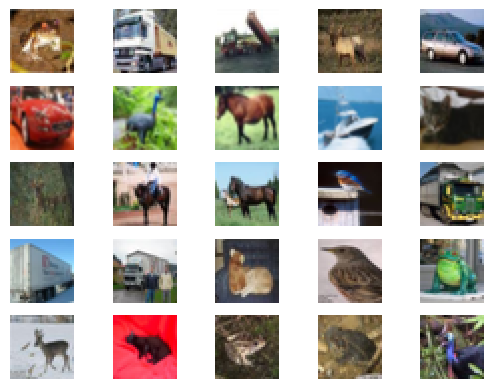

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot2grid((5, 5), (i, j))
            plt.imshow(X[k], cmap='gray')
            k = k + 1
            plt.axis('off')
    # show the plot
    plt.show()

# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [4]:
# MLP: Input data should be 'flattened'. Alternatively we could use a layer for that.
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [6]:
from tensorflow.keras import layers

E = 5  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST
H = 64

#model = keras.models.Sequential()

# one layer network
#model.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.05)))
# or considering a specific layer for the softmax: model.add(keras.layers.Activation('softmax'))

# two layers network
#model.add(Dense(H, input_shape=(D,), activation='relu'))
#model.add(Dense(n_classes, input_shape=(D,), activation='softmax'))

inputs = keras.Input(shape=(D,), name="digits")
x = layers.Dense(H, activation="relu", name="dense_1")(inputs)
x = layers.Dense(H, activation="relu", name="dense_2")(x)
outputs = layers.Dense(n_classes, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 3072)]            0         
                                                                 
 dense_1 (Dense)             (None, 64)                196672    
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 predictions (Dense)         (None, 10)                650       
                                                                 
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

Epoch 1/5
391/391 [==============================] - 3s 5ms/step - loss: 1.9185 - accuracy: 0.3092 - val_loss: 1.7680 - val_accuracy: 0.3700
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 1.7486 - accuracy: 0.3790 - val_loss: 1.7149 - val_accuracy: 0.3894
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 1.6841 - accuracy: 0.3999 - val_loss: 1.6526 - val_accuracy: 0.4131
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 1.6381 - accuracy: 0.4178 - val_loss: 1.6168 - val_accuracy: 0.4304
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 1.6088 - accuracy: 0.4272 - val_loss: 1.5890 - val_accuracy: 0.4414


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

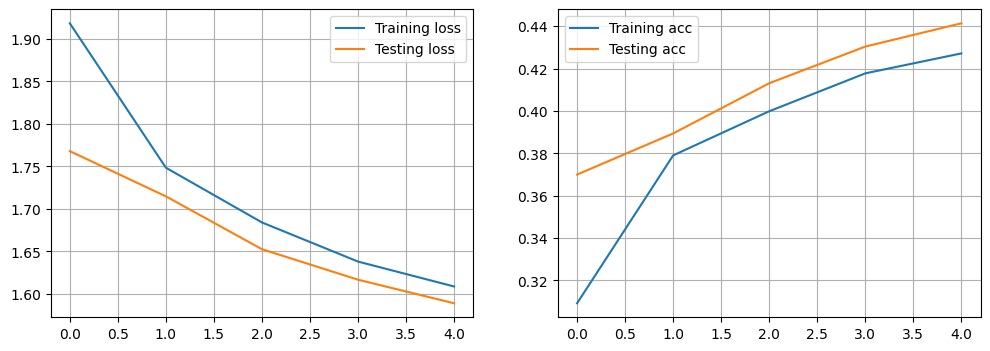

In [8]:
f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [9]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.5890288352966309
Test accuracy: 0.4413999915122986


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output of this function is an array with the predicted class probabilities, from which we need to take the argmax for each row to get the class label as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [10]:
pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(pred, axis=-1)
print(y_pred[:10])
print(y_test[:10])

313/313 [==============================] - 1s 1ms/step
[3 1 8 0 4 6 3 6 2 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[548  56  23   8  33  12  36  84 163  37]
 [ 52 643   7   9  13  23  29  64  66  94]
 [133  46 166  41 162  67 184 162  30   9]
 [ 45  56  44 142  76 177 202 169  35  54]
 [ 74  29  79  19 326  40 189 207  24  13]
 [ 42  36  56  76  74 303 149 205  37  22]
 [  8  24  42  39  95  49 619  90  15  19]
 [ 53  40  21  26  60  42  59 638  11  50]
 [133  96   9  10  18  32  11  38 586  67]
 [ 59 254   4  18  11  20  41  78  72 443]]


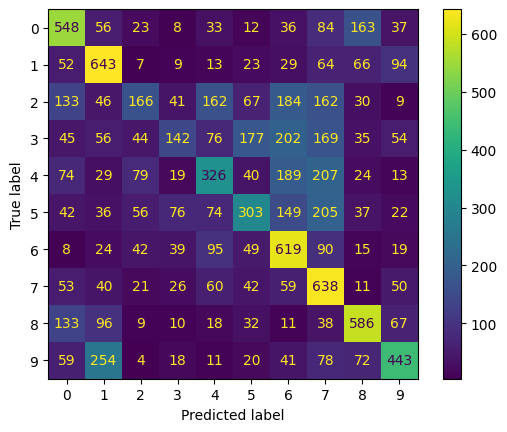

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 64)
(64,)
(64, 64)
(64,)
(64, 10)
(10,)


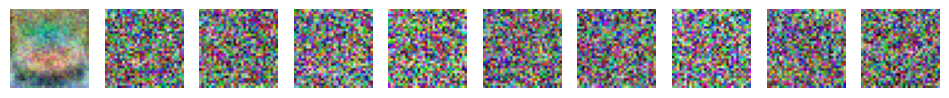

In [13]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12, 12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1 + i)
    im = w1[:, i]  # get the weights landing to neuron i
    im = im.reshape(32, 32, 3)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min) / (max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

# Two-layer network and weight visualisation
## Define the network

## Loading the raw data
First load the `mnist` dataset and normalize it to be in the range [0, 1]

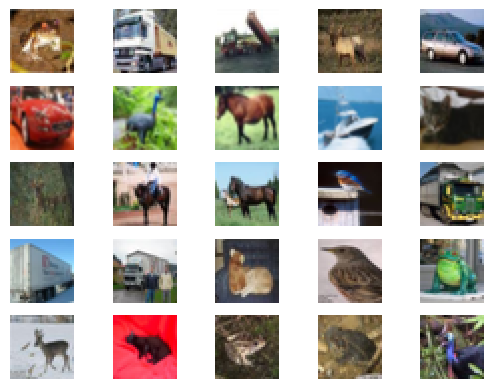

50000 train samples
10000 test samples


In [14]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot2grid((5, 5), (i, j))
            plt.imshow(X[k], cmap='gray')
            k = k + 1
            plt.axis('off')
    # show the plot
    plt.show()


# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)
# MLP: Input data should be 'flattened'. Alternatively we could use a layer for that.
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [15]:
#E = 30                # number of epochs
E = 15  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

model = keras.models.Sequential()

# two layers network
H = 128
model.add(keras.layers.Dense(H, input_shape=(D,), activation='relu', ))
model.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

Epoch 1/15
391/391 [==============================] - 2s 5ms/step - loss: 1.9704 - accuracy: 0.3034 - val_loss: 1.8504 - val_accuracy: 0.3418
Epoch 2/15
391/391 [==============================] - 1s 4ms/step - loss: 1.7809 - accuracy: 0.3708 - val_loss: 1.7499 - val_accuracy: 0.3830
Epoch 3/15
391/391 [==============================] - 2s 4ms/step - loss: 1.7179 - accuracy: 0.3928 - val_loss: 1.7180 - val_accuracy: 0.3927
Epoch 4/15
391/391 [==============================] - 1s 4ms/step - loss: 1.6706 - accuracy: 0.4101 - val_loss: 1.6620 - val_accuracy: 0.4153
Epoch 5/15
391/391 [==============================] - 1s 4ms/step - loss: 1.6337 - accuracy: 0.4252 - val_loss: 1.6121 - val_accuracy: 0.4279
Epoch 6/15
391/391 [==============================] - 1s 4ms/step - loss: 1.6016 - accuracy: 0.4348 - val_loss: 1.6081 - val_accuracy: 0.4237
Epoch 7/15
391/391 [==============================] - 1s 4ms/step - loss: 1.5768 - accuracy: 0.4416 - val_loss: 1.6138 - val_accuracy: 0.4284
Epoch 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

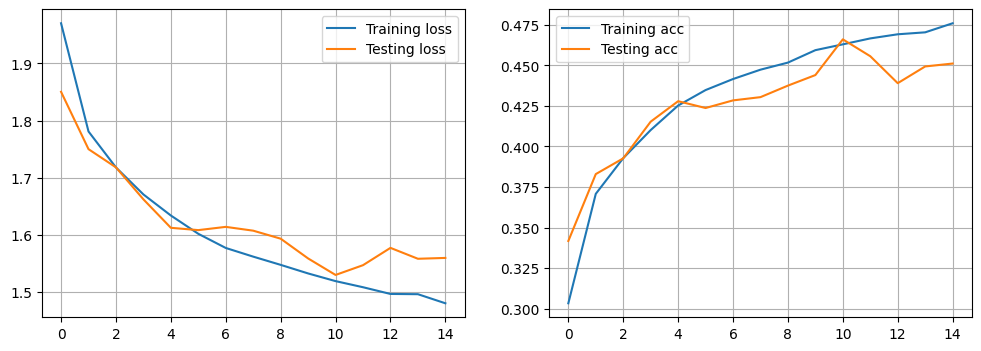

In [17]:
f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [18]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.5593973398208618
Test accuracy: 0.4510999917984009


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output of this function is an array with the predicted class probabilities, from which we need to take the argmax for each row to get the class label as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [19]:
pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(pred, axis=-1)
print(y_pred[:10])
print(y_test[:10])

313/313 [==============================] - 1s 2ms/step
[6 9 8 2 4 6 3 6 5 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[405  20 142  34  44  19  33  76 152  75]
 [ 28 452  41  38  28  28  38  36  77 234]
 [ 48  18 367  82 160  79 137  79  14  16]
 [ 18  12 109 305  87 194 143  71  20  41]
 [ 26   3 162  66 418  50 136 102  23  14]
 [  9   9 127 188 105 336  92  89  26  19]
 [  4   5  91  83 137  58 560  37  12  13]
 [ 18   8  94  59 118  81  38 531  16  37]
 [ 87  35  58  35  28  39  12  30 574 102]
 [ 25 112  28  54  27  20  39  64  68 563]]


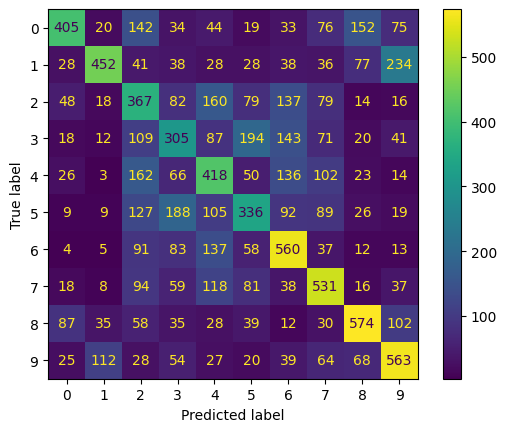

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 128)
(128,)
(128, 10)
(10,)


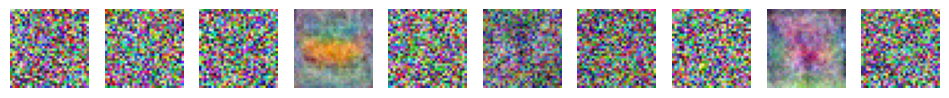

In [22]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12, 12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1 + i)
    im = w1[:, i]  # get the weights landing to neuron i
    im = im.reshape(32, 32, 3)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min) / (max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

# CNN
## Load Data

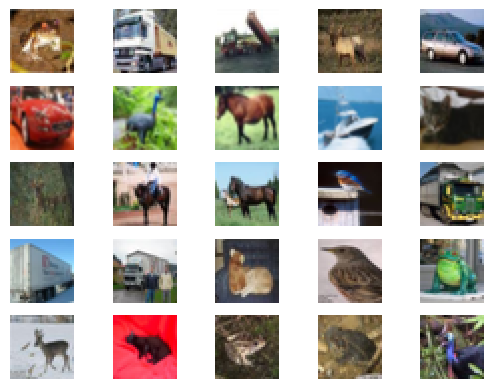

50000 train samples
10000 test samples


In [23]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot2grid((5, 5), (i, j))
            plt.imshow(X[k], cmap='gray')
            k = k + 1
            plt.axis('off')
    # show the plot
    plt.show()


# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

In [24]:
#E = 30                # number of epochs
E = 15  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(S, S), input_shape=(32, 32, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Reshape((16 * 16 * 32,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 reshape (Reshape)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
__________________________________________________

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

Epoch 1/15
  1/391 [..............................] - ETA: 7:04 - loss: 135.4327 - accuracy: 0.0859

2023-05-04 23:52:11.623564: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


391/391 [==============================] - 3s 5ms/step - loss: 13.2137 - accuracy: 0.2822 - val_loss: 1.9324 - val_accuracy: 0.3616
Epoch 2/15
391/391 [==============================] - 2s 4ms/step - loss: 1.7494 - accuracy: 0.4115 - val_loss: 1.7255 - val_accuracy: 0.4180
Epoch 3/15
391/391 [==============================] - 2s 4ms/step - loss: 1.5417 - accuracy: 0.4727 - val_loss: 1.6809 - val_accuracy: 0.4298
Epoch 4/15
391/391 [==============================] - 2s 4ms/step - loss: 1.4178 - accuracy: 0.5098 - val_loss: 1.6472 - val_accuracy: 0.4581
Epoch 5/15
391/391 [==============================] - 2s 4ms/step - loss: 1.3440 - accuracy: 0.5366 - val_loss: 1.5952 - val_accuracy: 0.4754
Epoch 6/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2834 - accuracy: 0.5549 - val_loss: 1.6207 - val_accuracy: 0.4689
Epoch 7/15
391/391 [==============================] - 2s 4ms/step - loss: 1.2249 - accuracy: 0.5764 - val_loss: 1.6155 - val_accuracy: 0.4802
Epoch 8/15
391/3

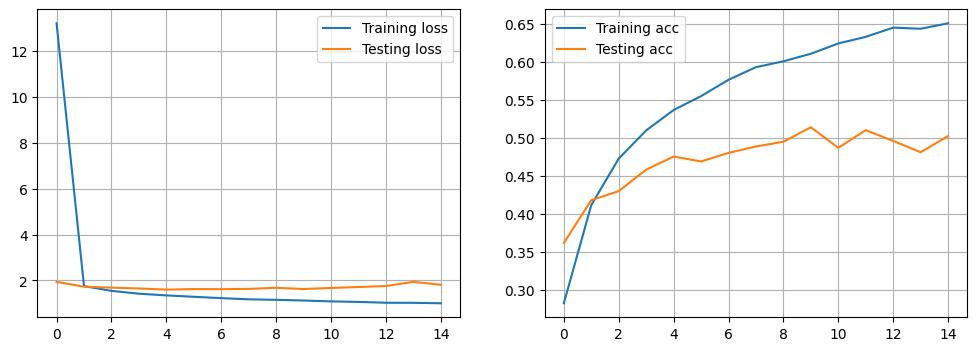

In [27]:
f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation

In [28]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.8065845966339111
Test accuracy: 0.5023999810218811


### Confusion matrix

In [29]:
pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(pred, axis=-1)
print(y_pred[:10])
print(y_test[:10])

313/313 [==============================] - 1s 2ms/step
[3 1 8 8 2 6 1 4 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[592  36  81  23  34  14  21  30  94  75]
 [ 59 638  21  21   9  12  28  19  39 154]
 [ 92  10 395  58 139  95  98  68  24  21]
 [ 56  25 111 298  94 176 106  82  16  36]
 [ 47   6 153  77 430  65  83 121   8  10]
 [ 30  18 127 175  78 341  77 108  26  20]
 [ 31  14  95 112  82  49 559  40   8  10]
 [ 32   9  62  62  79  69  28 626   7  26]
 [210  75  28  24   4  15  20  11 549  64]
 [ 70 139  26  31  15  15  18  39  51 596]]


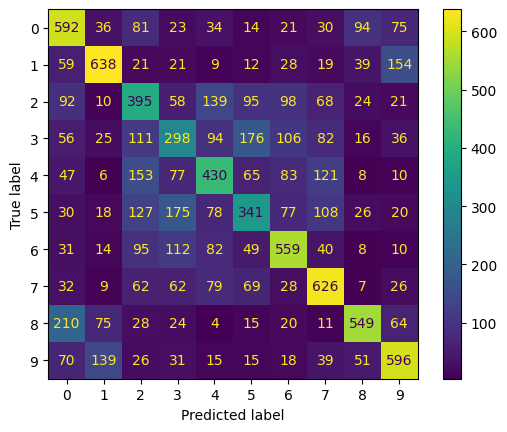

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Deeper CNN
### Load Data

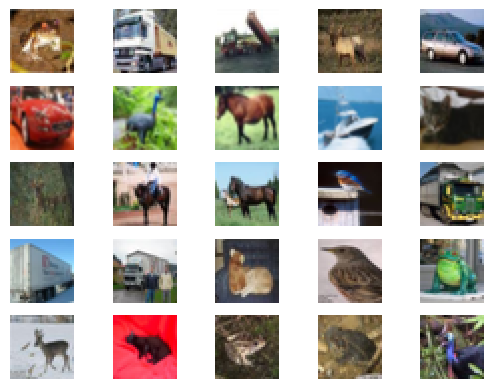

50000 train samples
10000 test samples


In [32]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot2grid((5, 5), (i, j))
            plt.imshow(X[k], cmap='gray')
            k = k + 1
            plt.axis('off')
    # show the plot
    plt.show()


# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

### Model 1

In [33]:
#E = 30                # number of epochs
E = 15  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(S, S), input_shape=(32, 32, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(S, S), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Reshape((8 * 8 * 64,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 activation_2 (Activation)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 2.7986 - accuracy: 0.2530 - val_loss: 1.7541 - val_accuracy: 0.3704
Epoch 2/15
391/391 [==============================] - 2s 6ms/step - loss: 1.6953 - accuracy: 0.3878 - val_loss: 1.5800 - val_accuracy: 0.4225
Epoch 3/15
391/391 [==============================] - 2s 6ms/step - loss: 1.4703 - accuracy: 0.4752 - val_loss: 1.3975 - val_accuracy: 0.5003
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 1.3309 - accuracy: 0.5287 - val_loss: 1.3441 - val_accuracy: 0.5317
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 1.2490 - accuracy: 0.5602 - val_loss: 1.3040 - val_accuracy: 0.5526
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 1.1717 - accuracy: 0.5880 - val_loss: 1.2329 - val_accuracy: 0.5731
Epoch 7/15
391/391 [==============================] - 3s 6ms/step - loss: 1.1109 - accuracy: 0.6123 - val_loss: 1.2445 - val_accuracy: 0.5767
Epoch 

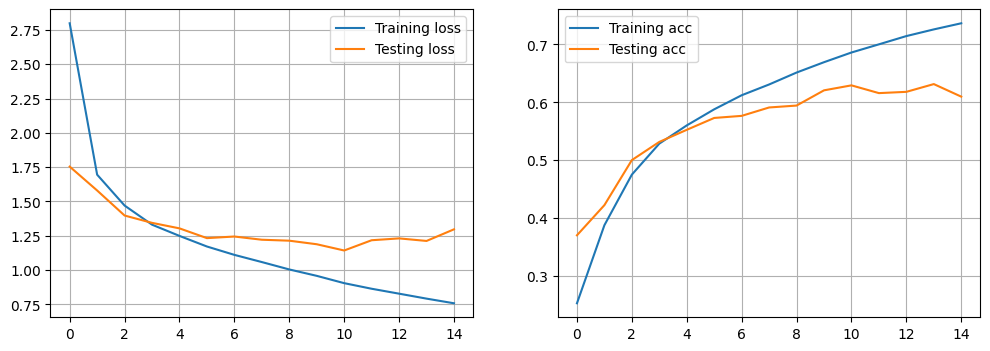

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

### Model 2

In [35]:
#E = 30                # number of epochs
E = 15  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(S, S), input_shape=(32, 32, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(S, S), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(128, kernel_size=(7, 7), strides=(S, S), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Reshape((4 * 4 * 128,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 activation_4 (Activation)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Epoch 1/15
391/391 [==============================] - 4s 8ms/step - loss: 2.7273 - accuracy: 0.2454 - val_loss: 1.6830 - val_accuracy: 0.3748
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.6184 - accuracy: 0.4097 - val_loss: 1.4885 - val_accuracy: 0.4688
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4686 - accuracy: 0.4718 - val_loss: 1.3492 - val_accuracy: 0.5138
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3428 - accuracy: 0.5196 - val_loss: 1.2339 - val_accuracy: 0.5631
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2455 - accuracy: 0.5567 - val_loss: 1.1862 - val_accuracy: 0.5794
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1687 - accuracy: 0.5877 - val_loss: 1.1747 - val_accuracy: 0.6023
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1020 - accuracy: 0.6118 - val_loss: 1.1085 - val_accuracy: 0.6193
Epoch 

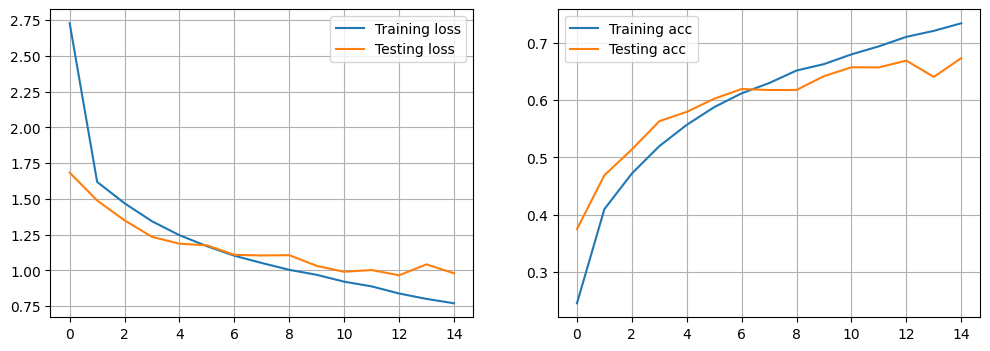

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

### Model 3

In [37]:
#E = 30                # number of epochs
E = 20  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(S, S), input_shape=(32, 32, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(S, S), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(S, S), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)       

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7168 - accuracy: 0.3855 - val_loss: 1.5156 - val_accuracy: 0.4754
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.3503 - accuracy: 0.5146 - val_loss: 1.1388 - val_accuracy: 0.5971
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.1743 - accuracy: 0.5833 - val_loss: 1.0116 - val_accuracy: 0.6398
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0612 - accuracy: 0.6230 - val_loss: 1.1963 - val_accuracy: 0.5941
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9936 - accuracy: 0.6516 - val_loss: 0.9048 - val_accuracy: 0.6818
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9326 - accuracy: 0.6712 - val_loss: 0.7811 - val_accuracy: 0.7297
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8841 - accuracy: 0.6892 - val_loss: 0.8209 - val_accuracy: 0.7106
Epoch 

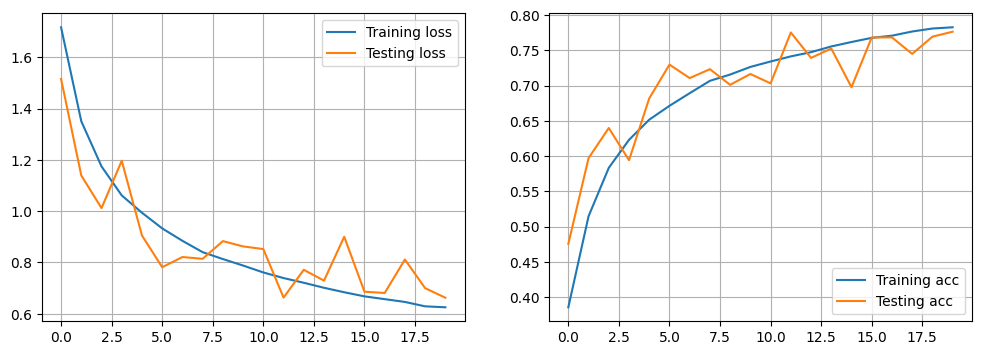

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

### Model 4

In [39]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from keras.models import Sequential

#E = 30                # number of epochs
E = 20  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                      

Epoch 1/20
391/391 [==============================] - 10s 22ms/step - loss: 1.2715 - accuracy: 0.5526 - val_loss: 1.0576 - val_accuracy: 0.6395
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 0.7824 - accuracy: 0.7224 - val_loss: 0.8550 - val_accuracy: 0.7104
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.6200 - accuracy: 0.7846 - val_loss: 0.7931 - val_accuracy: 0.7289
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5047 - accuracy: 0.8232 - val_loss: 0.7932 - val_accuracy: 0.7387
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.4168 - accuracy: 0.8529 - val_loss: 0.5605 - val_accuracy: 0.8132
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3379 - accuracy: 0.8799 - val_loss: 0.5685 - val_accuracy: 0.8165
Epoch 7/20
391/391 [==============================] - 8s 20ms/step - loss: 0.2859 - accuracy: 0.8988 - val_loss: 0.5859 - val_accuracy: 0.813

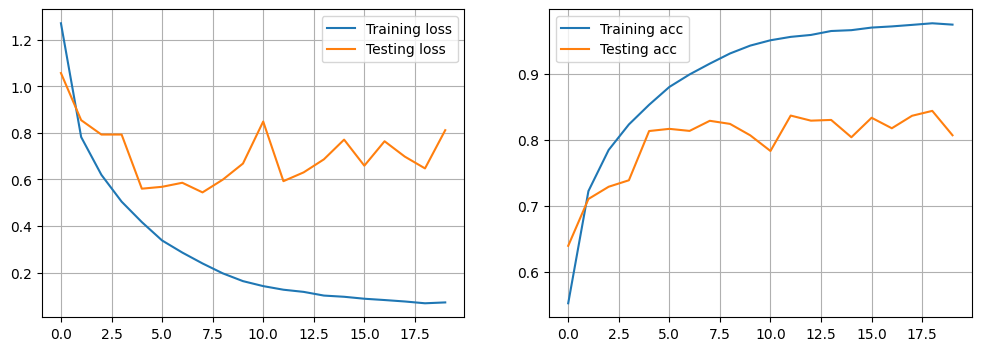

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

### Model 5

In [41]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from keras.models import Sequential

#E = 30                # number of epochs
E = 20  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128

c = 64

while c <= 256:
    print("Layer: ", c)
    model.add(Conv2D(c, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(c, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.25))
    c = c * 2

model.add(Flatten())
model.add(Dense(c))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Layer:  64
Layer:  128
Layer:  256
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_17 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_18 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)       256       
 chNormalization)  

Epoch 1/20
391/391 [==============================] - 10s 21ms/step - loss: 1.2845 - accuracy: 0.5506 - val_loss: 1.6534 - val_accuracy: 0.5097
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 0.8234 - accuracy: 0.7127 - val_loss: 0.9353 - val_accuracy: 0.6781
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.6482 - accuracy: 0.7739 - val_loss: 0.7168 - val_accuracy: 0.7565
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5273 - accuracy: 0.8161 - val_loss: 0.7351 - val_accuracy: 0.7534
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.4385 - accuracy: 0.8465 - val_loss: 0.5942 - val_accuracy: 0.7963
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3551 - accuracy: 0.8760 - val_loss: 0.7251 - val_accuracy: 0.7675
Epoch 7/20
391/391 [==============================] - 8s 20ms/step - loss: 0.2995 - accuracy: 0.8948 - val_loss: 0.6297 - val_accuracy: 0.809

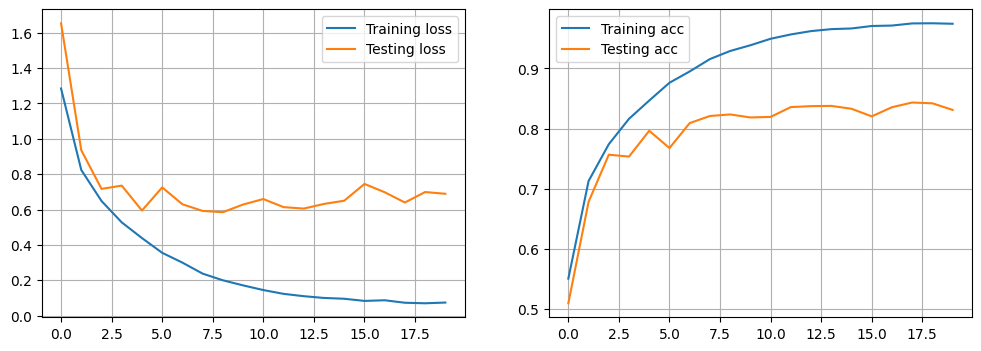

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

### Model 6

In [43]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from keras.models import Sequential

#E = 30                # number of epochs
E = 20  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128

c = 64

while c <= 512:
    print("Layer: ", c)
    model.add(Conv2D(c, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(c, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.25))
    c = c * 2

model.add(Flatten())
model.add(Dense(c))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Layer:  64
Layer:  128
Layer:  256
Layer:  512
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_25 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_26 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 64)       256       
 chNorm

Epoch 1/20
391/391 [==============================] - 12s 27ms/step - loss: 1.4112 - accuracy: 0.5055 - val_loss: 1.3473 - val_accuracy: 0.5498
Epoch 2/20
391/391 [==============================] - 10s 25ms/step - loss: 0.8856 - accuracy: 0.6894 - val_loss: 1.2079 - val_accuracy: 0.5977
Epoch 3/20
391/391 [==============================] - 10s 25ms/step - loss: 0.6820 - accuracy: 0.7624 - val_loss: 0.6394 - val_accuracy: 0.7786
Epoch 4/20
391/391 [==============================] - 10s 25ms/step - loss: 0.5396 - accuracy: 0.8121 - val_loss: 0.8324 - val_accuracy: 0.7264
Epoch 5/20
391/391 [==============================] - 10s 25ms/step - loss: 0.4554 - accuracy: 0.8399 - val_loss: 0.6170 - val_accuracy: 0.8033
Epoch 6/20
391/391 [==============================] - 10s 25ms/step - loss: 0.3857 - accuracy: 0.8648 - val_loss: 0.5050 - val_accuracy: 0.8336
Epoch 7/20
391/391 [==============================] - 10s 25ms/step - loss: 0.3289 - accuracy: 0.8854 - val_loss: 0.5540 - val_accuracy:

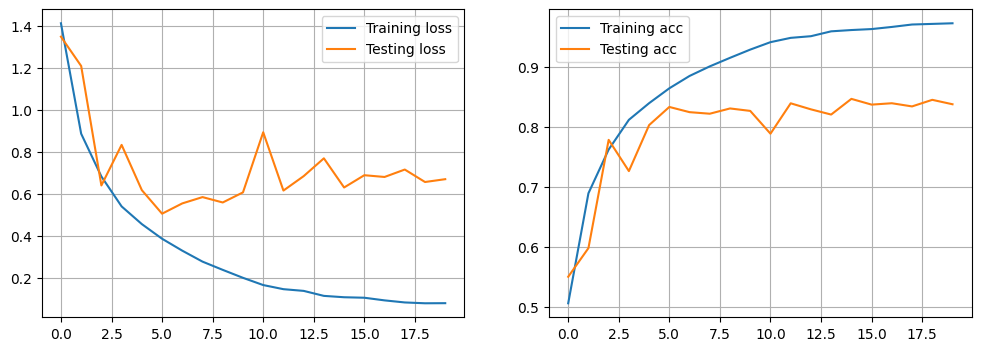

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

### Model 7

In [56]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from keras.models import Sequential

#E = 30                # number of epochs
E = 20  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

S = 1  # stride

model = keras.models.Sequential()

# two layers network
H = 128

c = 32

while c <= 512:
    print("Layer: ", c)
    model.add(Conv2D(c, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(c, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.25))
    c = c * 2

model.add(Flatten())
model.add(Dense(c))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Layer:  32
Layer:  64
Layer:  128
Layer:  256
Layer:  512
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 activation_155 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 batch_normalization_138 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_134 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 activation_156 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 batch_normalization_139 (Ba  (None, 32, 32, 32)       128   

Epoch 1/20
391/391 [==============================] - 10s 22ms/step - loss: 1.5729 - accuracy: 0.4417 - val_loss: 1.4027 - val_accuracy: 0.5395
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 1.0722 - accuracy: 0.6227 - val_loss: 1.0597 - val_accuracy: 0.6554
Epoch 3/20
391/391 [==============================] - 8s 21ms/step - loss: 0.8550 - accuracy: 0.7041 - val_loss: 0.9504 - val_accuracy: 0.6761
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.7274 - accuracy: 0.7469 - val_loss: 0.8119 - val_accuracy: 0.7312
Epoch 5/20
391/391 [==============================] - 8s 21ms/step - loss: 0.6383 - accuracy: 0.7785 - val_loss: 0.7178 - val_accuracy: 0.7617
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5710 - accuracy: 0.8021 - val_loss: 0.7036 - val_accuracy: 0.7680
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.5188 - accuracy: 0.8200 - val_loss: 0.7013 - val_accuracy: 0.768

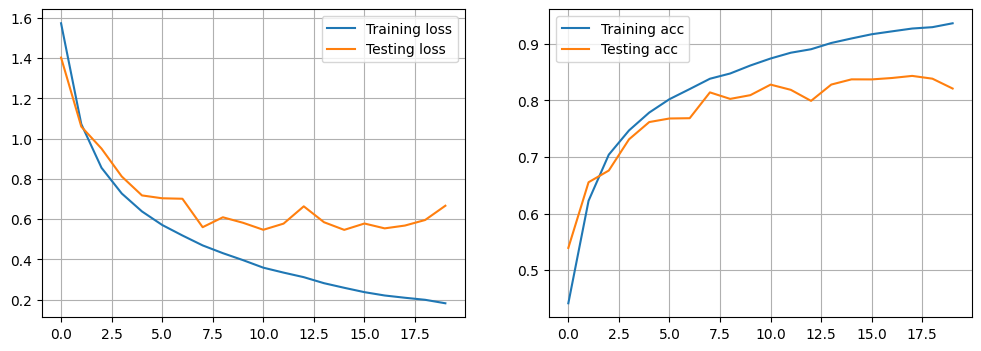

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12, 4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)